In [5]:

import pandas as pd
df = pd.read_csv("WineQT.csv")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [6]:
df.drop("Id", axis=1, inplace=True)

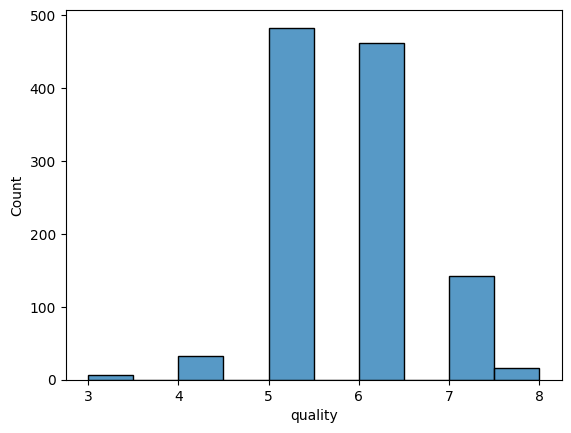

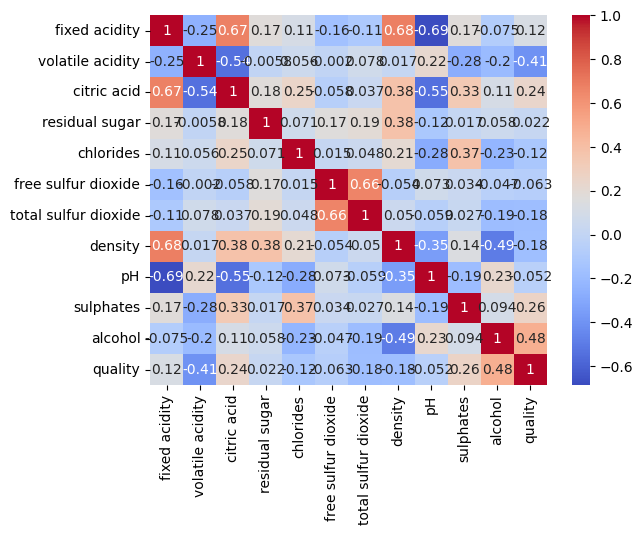

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["quality"], bins=10)
plt.show()

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [8]:

from sklearn.model_selection import train_test_split

X = df.drop("quality", axis=1)
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


RF Accuracy: 0.6986899563318777
LR Accuracy: 0.62882096069869


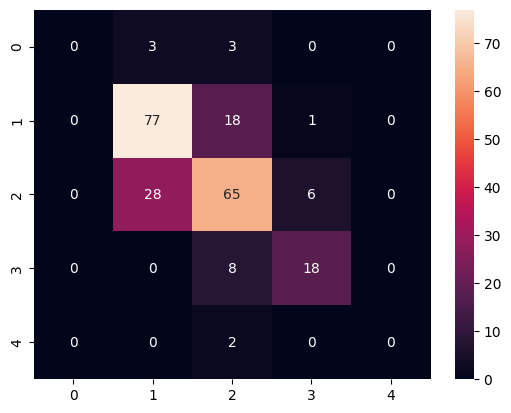

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_preds = rf.predict(X_test)
lr_preds = lr.predict(X_test)

print("RF Accuracy:", accuracy_score(y_test, rf_preds))
print("LR Accuracy:", accuracy_score(y_test, lr_preds))

sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt="d")
plt.show()

In [15]:
# filepath: c:\Users\user\Desktop\Streamlit\Training.ipynb
import pickle

# After training your model (rf)
with open("model.pkl", "wb") as f:
    pickle.dump(rf, f)

In [16]:
import pickle
model = pickle.load(open("model.pkl", "rb"))

In [17]:
# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)